# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

Este exercicío consiste em treinar um modelo de uma única camada linear no MNIST **sem** usar as seguintes funções do pytorch:

- torch.nn.Linear
- torch.nn.CrossEntropyLoss
- torch.nn.NLLLoss
- torch.nn.LogSoftmax
- torch.optim.SGD
- torch.utils.data.Dataloader

## Importação das bibliotecas

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torchvision
from torchvision.datasets import MNIST

## Fixando as seeds

In [3]:
random.seed(123)
np.random.seed(123)
torch.manual_seed(123)

## Dataloader

### Definição do tamanho do minibatch

In [4]:
batch_size = 50

### Carregamento, criação dataset e do dataloader

In [5]:
dataset_dir = '../data/'

dataset_train_full = MNIST(dataset_dir, train=True, download=True,
                           transform=torchvision.transforms.ToTensor())
print(dataset_train_full.data.shape)
print(dataset_train_full.targets.shape)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

torch.Size([60000, 28, 28])
torch.Size([60000])


### Usando apenas 1000 amostras do MNIST

Neste exercício utilizaremos 1000 amostras de treinamento.

In [6]:
indices = torch.randperm(len(dataset_train_full))[:1000]
dataset_train = torch.utils.data.Subset(dataset_train_full, indices)

#### Explorando o dataset para entender os tipos

In [7]:
dataset_train[0][0].shape # input

torch.Size([1, 28, 28])

In [8]:
dataset_train[0][1] # target

1

In [9]:
import random
import math

class DataLoaderDeep():
    def __init__(self, dataset, batch_size: int = 10,
                 shuffle: bool = False):
        
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.steps = 0
        self.count_idx = 0
        self.index_global = 0
    
    def shuffle_func(self):
        for i in range(len(self.array_index_batch)-1, 0, -1):
            j = random.randint(0, i)
            self.array_index_batch[i], self.array_index_batch[j]\
             = self.array_index_batch[j], self.array_index_batch[i]

    def index_batch(self):
        if self.shuffle is True:
            self.array_index_batch = np.array(range(len(self.dataset)))

        if self.shuffle is False:
            self.array_index_batch = list(range(len(self.dataset)))

    def __iter__(self):
        self.index_batch()
        return self

    def __next__(self):
        
        if len(self.array_index_batch) == 0:
            self.index_batch()
            raise StopIteration
        
        if self.shuffle is True:
            self.shuffle_func()
            batch_data   = [torch.unsqueeze(self.dataset[x][0],0) for\
                      x in self.array_index_batch[:self.batch_size]]

            batch_target = [self.dataset[x][1] for\
                        x in self.array_index_batch[:self.batch_size]]
                                        
        if self.shuffle is False:
           slice_batch = [self.array_index_batch.pop(0) for _ in list(range(self.batch_size))]
           batch_data   = [torch.unsqueeze(self.dataset[x][0],0) for\
                      x in slice_batch]

           batch_target = [self.dataset[x][1] for\
                        x in slice_batch]

        return torch.concat(batch_data,0), torch.as_tensor(batch_target)
    
    def __len__(self):
        return int(len(self.dataset) / self.batch_size)

    def size(self):
        return self.batch_data[0].shape

In [10]:
# Escreva aqui o equivalente do código abaixo:
#loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=False)

loader_train = DataLoaderDeep(dataset_train, batch_size=batch_size, shuffle=False)

In [11]:
# for x_train, y_train in loader_train:
#     print(x_train.shape)
    

In [12]:
print('Número de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de treinamento: 20

Dimensões dos dados de um minibatch: torch.Size([50, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


## Modelo

In [13]:
# Escreva aqui o codigo para criar um modelo cujo o equivalente é: 
# model = torch.nn.Linear(28*28, 10)

In [14]:
from torch.nn.functional import softmax

class Linear():
    def __init__(self, input, output):
        self.w = torch.zeros((input, output), requires_grad=True)
        self.b = torch.zeros((1, output), requires_grad=True)

    def __call__(self, x):

        y_pred = torch.mm(x,self.w) + self.b
        return softmax(y_pred, 1)
    

    def parameters(self):
        return [self.w, self.b]

In [15]:
model = Linear(28*28, 10)

## Treinamento

### Inicialização dos parâmetros

In [16]:
n_epochs = 50
lr = 0.1

## Definição da Loss



In [17]:
# Escreva aqui o equivalente de:
# criterion = torch.nn.CrossEntropyLoss()
torch.sum(torch.Tensor([[1,2,0,0]])*torch.Tensor([[1,2,0,0]]),1)

tensor([5.])

In [18]:

class CrossEntropyLoss():
  def __call__(self, y_pred, y_true):
    
    batch, output_dim = y_pred.shape[0], y_pred.shape[1]

    y_true_one_hot = torch.eye(batch, output_dim)

    y_true_one_hot = y_true_one_hot[y_true]

    loss_vect_row = torch.sum(-y_true_one_hot * torch.log(y_pred), 1)

    self.loss = torch.mean(loss_vect_row)

    return self.loss

In [19]:
criterion = CrossEntropyLoss()

# Definição do Optimizer

In [20]:
# Escreva aqui o equivalente de:
# optimizer = torch.optim.SGD(model.parameters(), lr)

In [21]:
class SGD():
    def __init__(self, parameters, lr):
        self.parameters = parameters
        self.lr = lr
    
    def step(self):
        for param in self.parameters:
            #print(f"param.data = {param.data}")
            #print(f"parameter.grad = {param.grad}")
            param.data = param.data - self.lr * param.grad
            #print(f"SGD parameter after = {param.data.shape}")
  
    def zero_grad(self):
        for param in self.parameters:
            param.grad = torch.zeros_like(param.data)

In [22]:
optimizer = SGD(model.parameters(), lr)

### Laço de treinamento dos parâmetros

In [23]:
epochs = []
loss_history = []
loss_epoch_end = []
total_trained_samples = 0

n_epochs = 50

for i in range(n_epochs):
    # Substitua aqui o loader_train de acordo com sua implementação do dataloader.
    for x_train, y_train in loader_train:
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model(inputs)
        # calcula a perda
        loss = criterion(outputs, y_train)
        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        # Escreva aqui o código cujo o resultado é equivalente às 3 linhas abaixo:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / len(dataset_train))
        loss_history.append(loss.item())

    loss_epoch_end.append(loss.item())
    print(f'Epoch: {i:d}/{n_epochs - 1:d} Loss: {loss.item()}')

Epoch: 0/49 Loss: 1.1979684829711914
Epoch: 1/49 Loss: 0.867622971534729
Epoch: 2/49 Loss: 0.7226786613464355
Epoch: 3/49 Loss: 0.6381281614303589
Epoch: 4/49 Loss: 0.5809750556945801
Epoch: 5/49 Loss: 0.5387411713600159
Epoch: 6/49 Loss: 0.5056463479995728
Epoch: 7/49 Loss: 0.47862711548805237
Epoch: 8/49 Loss: 0.4558936655521393
Epoch: 9/49 Loss: 0.43632182478904724
Epoch: 10/49 Loss: 0.4191650450229645
Epoch: 11/49 Loss: 0.4039044976234436
Epoch: 12/49 Loss: 0.3901680111885071
Epoch: 13/49 Loss: 0.3776799440383911
Epoch: 14/49 Loss: 0.36623141169548035
Epoch: 15/49 Loss: 0.35566139221191406
Epoch: 16/49 Loss: 0.34584277868270874
Epoch: 17/49 Loss: 0.33667412400245667
Epoch: 18/49 Loss: 0.32807353138923645
Epoch: 19/49 Loss: 0.31997358798980713
Epoch: 20/49 Loss: 0.312318354845047
Epoch: 21/49 Loss: 0.3050611615180969
Epoch: 22/49 Loss: 0.29816246032714844
Epoch: 23/49 Loss: 0.29158854484558105
Epoch: 24/49 Loss: 0.28531038761138916
Epoch: 25/49 Loss: 0.2793029844760895
Epoch: 26/49 

### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

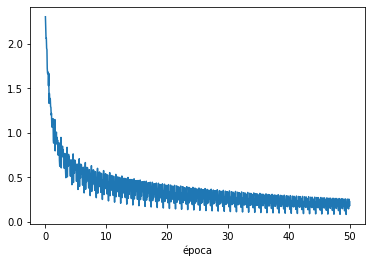

In [24]:
plt.plot(epochs, loss_history)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

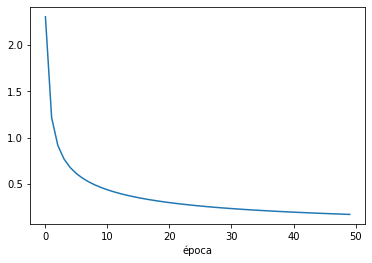

In [25]:
n_batches_train = len(loader_train)
plt.plot(epochs[::n_batches_train], loss_history[::n_batches_train])
plt.xlabel('época')

In [26]:
# Assert do histórico de losses
target_loss_epoch_end = np.array([
    1.1979684829711914,
    0.867622971534729,
    0.7226786613464355,
    0.6381281018257141,
    0.5809749960899353,
    0.5387411713600159,
    0.5056464076042175,
    0.4786270558834076,
    0.4558936357498169,
    0.4363219141960144,
    0.4191650450229645,
    0.4039044976234436,
    0.3901679515838623,
    0.3776799440383911,
    0.3662314713001251,
    0.35566139221191406,
    0.34584277868270874,
    0.33667415380477905,
    0.32807353138923645,
    0.31997355818748474,
    0.312318354845047,
    0.3050611615180969,
    0.29816246032714844,
    0.29158851504325867,
    0.28531041741371155,
    0.2793029546737671,
    0.273544579744339,
    0.2680158317089081,
    0.26270008087158203,
    0.2575823664665222,
    0.25264936685562134,
    0.24788929522037506,
    0.24329163134098053,
    0.23884665966033936,
    0.23454584181308746,
    0.23038141429424286,
    0.22634628415107727,
    0.22243399918079376,
    0.2186385989189148,
    0.21495483815670013,
    0.21137762069702148,
    0.20790249109268188,
    0.20452524721622467,
    0.20124195516109467,
    0.19804897904396057,
    0.1949428766965866,
    0.19192075729370117,
    0.188979372382164,
    0.18611609935760498,
    0.1833282858133316])

assert np.allclose(np.array(loss_epoch_end), target_loss_epoch_end, atol=1e-6)

## Exercício 

Escreva um código que responda às seguintes perguntas:

Qual é a amostra classificada corretamente, com maior probabilidade?

Qual é a amostra classificada erradamente, com maior probabilidade?

Qual é a amostra classificada corretamente, com menor probabilidade?

Qual é a amostra classificada erradamente, com menor probabilidade?

In [27]:
from torchvision.transforms import functional

In [28]:
x = []
y = []
y_preds = []

for x_train, y_train in loader_train:
    inputs = x_train.view(-1, 28 * 28)
    y_pred = model(inputs)
    x.append(x_train)
    y.append(y_train)
    y_preds.append(y_pred)

x = torch.cat(x, 0)
y = torch.cat(y, 0)
y_preds = torch.cat(y_preds, 0)

In [29]:
x_correct = x[y == y_preds.argmax(1)]
y_correct = y[y == y_preds.argmax(1)]
y_preds_correct = y_preds[y == y_preds.argmax(1)]

x_wrong = x[y != y_preds.argmax(1)]
y_wrong = y[y != y_preds.argmax(1)]
y_preds_wrong = y_preds[y != y_preds.argmax(1)]

idx_high_prob_correct = y_preds_correct.max(1).values.argmax()
idx_lowest_prob_correct = y_preds_correct.max(1).values.argmin()

idx_high_prob_wrong = y_preds_wrong.max(1).values.argmax()
idx_lowest_prob_wrong = y_preds_wrong.max(1).values.argmin()

Qual é a amostra classificada corretamente, com maior probabilidade?

In [30]:
functional.to_pil_image(x_correct[idx_high_prob_correct])

In [31]:
print(f'Class: {y_preds_correct[idx_high_prob_correct].argmax().item()}')
print(f'Probabilidade: {y_preds_correct[idx_high_prob_correct].max().item()}')

Class: 2
Probabilidade: 0.9999896287918091


Qual é a amostra classificada erradamente, com maior probabilidade?

In [32]:
functional.to_pil_image(x_wrong[idx_high_prob_wrong])

In [33]:
print(f'Class wrong: {y_preds_wrong[idx_high_prob_wrong].argmax().item()}')
print(f'Probabilidade: {y_preds_wrong[idx_high_prob_wrong].max().item()}')

Class wrong: 8
Probabilidade: 0.8530499339103699


Qual é a amostra classificada corretamente, com menor probabilidade?

In [34]:
functional.to_pil_image(x_correct[idx_lowest_prob_correct])

In [35]:
print(f'class: {y_preds_correct[idx_lowest_prob_correct].argmax().item()}')
print(f'probabilidade: {y_preds_correct[idx_lowest_prob_correct].max().item()}')

class: 2
probabilidade: 0.335326611995697


Qual é a amostra classificada erradamente, com menor probabilidade?

In [36]:
functional.to_pil_image(x_wrong[idx_lowest_prob_wrong])

In [37]:
print(f'class: {y_preds_wrong[idx_lowest_prob_wrong].argmax().item()}')
print(f'probabilidade {y_preds_wrong[idx_lowest_prob_wrong].max().item()}')

class: 8
probabilidade 0.2892138957977295


## Exercício Bonus

Implemente um dataloader que aceite como parâmetro de entrada a distribuição probabilidade das classes que deverão compor um batch.
Por exemplo, se a distribuição de probabilidade passada como entrada for:

`[0.01, 0.01, 0.72, 0.2, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]`

Em média, 72% dos exemplos do batch deverão ser da classe 2, 20% deverão ser da classe 3, e os demais deverão ser das outras classes.

Mostre também que sua implementação está correta.
